## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  52.656924  1628.468084  0.648787  1.181923  1.479705
1  72.907357  1699.402905  0.903437  1.006575  1.421921
2  50.713956   161.291431  0.992137  8.195669  1.258513
3  71.133444   566.081112  0.430656  2.400816  1.248320
4  64.932355   432.457443  0.095938  4.610733  0.601393


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9894996	total: 68ms	remaining: 1m 7s
1:	learn: 0.9789700	total: 68.6ms	remaining: 34.2s
2:	learn: 0.9691961	total: 69.2ms	remaining: 23s
3:	learn: 0.9583449	total: 69.7ms	remaining: 17.4s
4:	learn: 0.9491152	total: 70.3ms	remaining: 14s
5:	learn: 0.9387206	total: 70.7ms	remaining: 11.7s
6:	learn: 0.9288856	total: 71.3ms	remaining: 10.1s
7:	learn: 0.9193513	total: 71.9ms	remaining: 8.91s
8:	learn: 0.9097593	total: 72.5ms	remaining: 7.98s
9:	learn: 0.8990813	total: 73ms	remaining: 7.22s
10:	learn: 0.8915945	total: 73.4ms	remaining: 6.6s
11:	learn: 0.8825197	total: 74ms	remaining: 6.09s
12:	learn: 0.8746619	total: 74.4ms	remaining: 5.65s
13:	learn: 0.8672611	total: 75ms	remaining: 5.28s
14:	learn: 0.8579639	total: 75.5ms	remaining: 4.96s
15:	learn: 0.8505951	total: 76ms	remaining: 4.67s
16:	learn: 0.8424899	total: 76.6ms	remaining: 4.43s
17:	learn: 0.8340328	total: 77.1ms	remaining: 4.2s
18:	learn: 0.8247435	total: 77.5ms	remaining: 4s
19:	learn: 

93:	learn: 0.4317329	total: 108ms	remaining: 1.04s
94:	learn: 0.4283226	total: 108ms	remaining: 1.03s
95:	learn: 0.4246863	total: 109ms	remaining: 1.02s
96:	learn: 0.4209819	total: 109ms	remaining: 1.02s
97:	learn: 0.4180673	total: 110ms	remaining: 1.01s
98:	learn: 0.4149638	total: 110ms	remaining: 1s
99:	learn: 0.4115410	total: 111ms	remaining: 1s
100:	learn: 0.4082656	total: 112ms	remaining: 993ms
101:	learn: 0.4058821	total: 112ms	remaining: 985ms
102:	learn: 0.4037371	total: 112ms	remaining: 978ms
103:	learn: 0.4006418	total: 113ms	remaining: 970ms
104:	learn: 0.3977417	total: 113ms	remaining: 964ms
105:	learn: 0.3953050	total: 114ms	remaining: 958ms
106:	learn: 0.3918705	total: 114ms	remaining: 952ms
107:	learn: 0.3893041	total: 114ms	remaining: 946ms
108:	learn: 0.3868252	total: 115ms	remaining: 940ms
109:	learn: 0.3838128	total: 116ms	remaining: 935ms
110:	learn: 0.3811344	total: 116ms	remaining: 930ms
111:	learn: 0.3781833	total: 117ms	remaining: 925ms
112:	learn: 0.3745990	tot

276:	learn: 0.1454296	total: 186ms	remaining: 486ms
277:	learn: 0.1447072	total: 187ms	remaining: 485ms
278:	learn: 0.1440556	total: 187ms	remaining: 483ms
279:	learn: 0.1433211	total: 187ms	remaining: 482ms
280:	learn: 0.1426962	total: 188ms	remaining: 480ms
281:	learn: 0.1419437	total: 188ms	remaining: 479ms
282:	learn: 0.1414223	total: 188ms	remaining: 478ms
283:	learn: 0.1408082	total: 189ms	remaining: 476ms
284:	learn: 0.1402451	total: 189ms	remaining: 475ms
285:	learn: 0.1396325	total: 190ms	remaining: 473ms
286:	learn: 0.1390658	total: 190ms	remaining: 472ms
287:	learn: 0.1384439	total: 191ms	remaining: 471ms
288:	learn: 0.1378327	total: 191ms	remaining: 470ms
289:	learn: 0.1373188	total: 191ms	remaining: 469ms
290:	learn: 0.1367685	total: 192ms	remaining: 467ms
291:	learn: 0.1361854	total: 192ms	remaining: 466ms
292:	learn: 0.1355670	total: 193ms	remaining: 465ms
293:	learn: 0.1349221	total: 193ms	remaining: 464ms
294:	learn: 0.1343190	total: 194ms	remaining: 463ms
295:	learn: 

510:	learn: 0.0726802	total: 289ms	remaining: 277ms
511:	learn: 0.0725624	total: 290ms	remaining: 276ms
512:	learn: 0.0723363	total: 290ms	remaining: 275ms
513:	learn: 0.0720729	total: 291ms	remaining: 275ms
514:	learn: 0.0719691	total: 291ms	remaining: 274ms
515:	learn: 0.0718674	total: 291ms	remaining: 273ms
516:	learn: 0.0715994	total: 292ms	remaining: 273ms
517:	learn: 0.0714845	total: 292ms	remaining: 272ms
518:	learn: 0.0712677	total: 293ms	remaining: 271ms
519:	learn: 0.0710548	total: 293ms	remaining: 270ms
520:	learn: 0.0708176	total: 293ms	remaining: 270ms
521:	learn: 0.0707057	total: 294ms	remaining: 269ms
522:	learn: 0.0704979	total: 294ms	remaining: 268ms
523:	learn: 0.0702939	total: 295ms	remaining: 268ms
524:	learn: 0.0701703	total: 295ms	remaining: 267ms
525:	learn: 0.0699400	total: 295ms	remaining: 266ms
526:	learn: 0.0698316	total: 296ms	remaining: 266ms
527:	learn: 0.0696325	total: 296ms	remaining: 265ms
528:	learn: 0.0694370	total: 297ms	remaining: 264ms
529:	learn: 

689:	learn: 0.0502090	total: 368ms	remaining: 165ms
690:	learn: 0.0500432	total: 368ms	remaining: 165ms
691:	learn: 0.0499981	total: 369ms	remaining: 164ms
692:	learn: 0.0498360	total: 369ms	remaining: 164ms
693:	learn: 0.0497917	total: 370ms	remaining: 163ms
694:	learn: 0.0496333	total: 370ms	remaining: 162ms
695:	learn: 0.0495123	total: 370ms	remaining: 162ms
696:	learn: 0.0492952	total: 371ms	remaining: 161ms
697:	learn: 0.0491309	total: 371ms	remaining: 161ms
698:	learn: 0.0490874	total: 372ms	remaining: 160ms
699:	learn: 0.0489231	total: 373ms	remaining: 160ms
700:	learn: 0.0488653	total: 373ms	remaining: 159ms
701:	learn: 0.0488229	total: 373ms	remaining: 158ms
702:	learn: 0.0486617	total: 374ms	remaining: 158ms
703:	learn: 0.0484507	total: 374ms	remaining: 157ms
704:	learn: 0.0483336	total: 374ms	remaining: 157ms
705:	learn: 0.0482332	total: 375ms	remaining: 156ms
706:	learn: 0.0481340	total: 375ms	remaining: 155ms
707:	learn: 0.0479272	total: 376ms	remaining: 155ms
708:	learn: 

922:	learn: 0.0287412	total: 471ms	remaining: 39.3ms
923:	learn: 0.0286120	total: 472ms	remaining: 38.8ms
924:	learn: 0.0285970	total: 472ms	remaining: 38.3ms
925:	learn: 0.0285823	total: 473ms	remaining: 37.8ms
926:	learn: 0.0285436	total: 473ms	remaining: 37.2ms
927:	learn: 0.0285290	total: 473ms	remaining: 36.7ms
928:	learn: 0.0284114	total: 474ms	remaining: 36.2ms
929:	learn: 0.0283334	total: 474ms	remaining: 35.7ms
930:	learn: 0.0282952	total: 475ms	remaining: 35.2ms
931:	learn: 0.0282808	total: 475ms	remaining: 34.7ms
932:	learn: 0.0282431	total: 476ms	remaining: 34.2ms
933:	learn: 0.0281892	total: 476ms	remaining: 33.7ms
934:	learn: 0.0281749	total: 477ms	remaining: 33.1ms
935:	learn: 0.0281280	total: 477ms	remaining: 32.6ms
936:	learn: 0.0281139	total: 478ms	remaining: 32.1ms
937:	learn: 0.0280999	total: 478ms	remaining: 31.6ms
938:	learn: 0.0280632	total: 478ms	remaining: 31.1ms
939:	learn: 0.0280102	total: 479ms	remaining: 30.6ms
940:	learn: 0.0279964	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

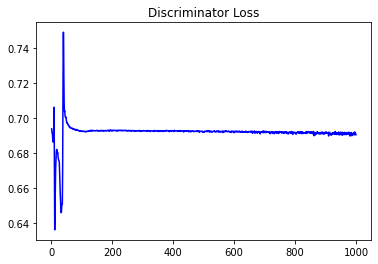

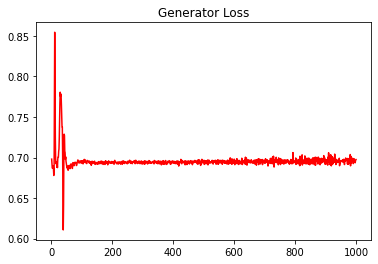

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16704635348372476


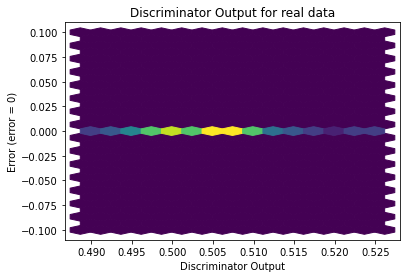

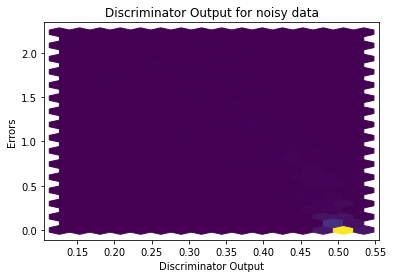

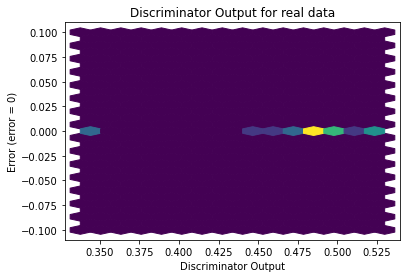

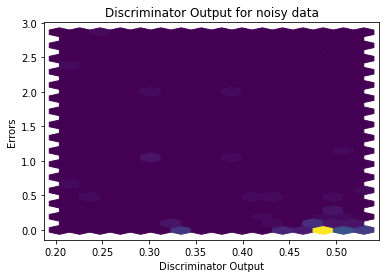

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


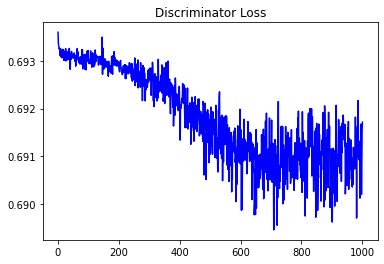

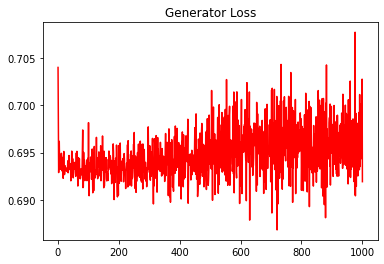

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.19928440336342906


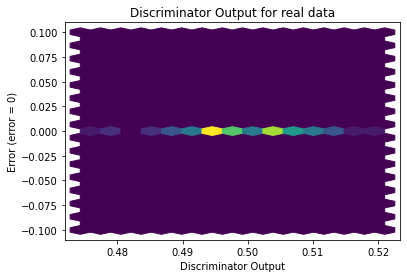

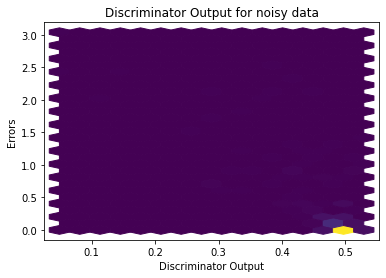

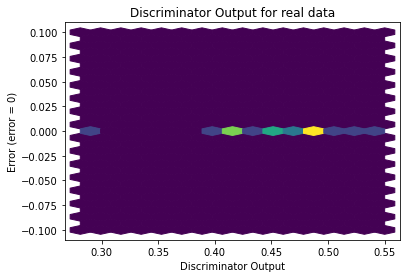

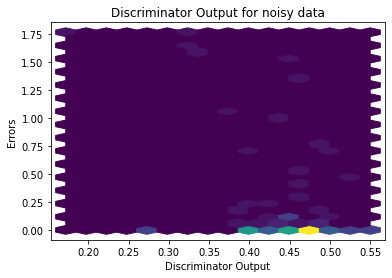

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2449]], requires_grad=True)
